# Set-up


## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
physical_devices= tf.config.list_physical_devices('GPU')
print('Num GPUs', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs 0


IndexError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

NotImplementedError: ignored

In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 6.4 MB/s 
     |████████████████████████████████| 182 kB 54.4 MB/s 


## Git-clone

In [ ]:
! git clone https://github.com/yossigandelsman/test_time_training_mae.git

Cloning into 'test_time_training_mae'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 59 (delta 22), reused 49 (delta 15), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [ ]:
%cd test_time_training_mae

/content/test_time_training_mae


In [ ]:
%ls

data/                environment.yml   main_test_time_training.py  util/
engine_pretrain.py   images/           models_mae_shared.py
engine_probing.py    main_pretrain.py  README.md
engine_test_time.py  main_prob.py      test_without_adaptation.py


In [ ]:
#from engine_pretrain import *

In [ ]:
#! pip install <desired-python-library>
#from engine_pretrain import *

In [ ]:
%mkdir checkpoints
%cd checkpoints
!wget https://dl.fbaipublicfiles.com/mae/pretrain/mae_pretrain_vit_large_full.pth

'''
mkdir checkpoints
cd checkpoints
wget https://dl.fbaipublicfiles.com/mae/pretrain/mae_pretrain_vit_large_full.pth
'''


/content/test_time_training_mae/checkpoints
--2023-01-09 14:56:59--  https://dl.fbaipublicfiles.com/mae/pretrain/mae_pretrain_vit_large_full.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318315181 (1.2G) [binary/octet-stream]
Saving to: ‘mae_pretrain_vit_large_full.pth’

mae_pretrain_vit_la 100%[===================>]   1.23G  52.8MB/s    in 26s     

2023-01-09 14:57:25 (48.8 MB/s) - ‘mae_pretrain_vit_large_full.pth’ saved [1318315181/1318315181]



'\nmkdir checkpoints\ncd checkpoints\nwget https://dl.fbaipublicfiles.com/mae/pretrain/mae_pretrain_vit_large_full.pth\n'

In [ ]:
!wget https://dl.fbaipublicfiles.com/mae/ttt/prob_lr1e-3_wd.2_blk12_ep20.pth

--2023-01-07 22:28:52--  https://dl.fbaipublicfiles.com/mae/ttt/prob_lr1e-3_wd.2_blk12_ep20.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2253412719 (2.1G) [binary/octet-stream]
Saving to: ‘prob_lr1e-3_wd.2_blk12_ep20.pth’

prob_lr1e-3_wd.2_bl 100%[===================>]   2.10G  53.4MB/s    in 42s     

2023-01-07 22:29:34 (51.3 MB/s) - ‘prob_lr1e-3_wd.2_blk12_ep20.pth’ saved [2253412719/2253412719]



In [ ]:
%ls


mae_pretrain_vit_large_full.pth


In [ ]:
%cd /content/test_time_training_mae
%ls 

/content/test_time_training_mae
checkpoints/         environment.yml             models_mae_shared.py
data/                images/                     README.md
engine_pretrain.py   main_pretrain.py            test_without_adaptation.py
engine_probing.py    main_prob.py                util/
engine_test_time.py  main_test_time_training.py


In [ ]:
%mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [ ]:
%cd dataset

/content/test_time_training_mae/dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


NotImplementedError: ignored

In [ ]:
DATA_PATH_BASE='/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C'
DATASET='gaussian_noise2'
LEVEL='5'
RESUME_MODEL='checkpoints/mae_pretrain_vit_large_full.pth'
RESUME_FINETUNE='checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth'
OUTPUT_DIR_BASE='/content/drive/MyDrive/Test-Time_training_with_MA/models_importés/output_dir'
data_path_=DATA_PATH_BASE+'/'+DATASET+'/'+LEVEL

In [ ]:
data_path_

'/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/gaussian_noise2/5'

In [ ]:
import torch
RESUME_MODEL_t=torch.load(RESUME_MODEL)
RESUME_FINETUNE_t=torch.load(RESUME_FINETUNE)

In [ ]:
!python main_test_time_training.py \
    --data_path "/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/5bis" \
    --model mae_vit_large_patch16 \
    --input_size 224 \
    --batch_size 256 \
    --steps_per_example 40 \
    --mask_ratio 0.95 \
    --blr 1e-2 \
    --norm_pix_loss \
    --optimizer_type 'sgd' \
    --classifier_depth 12 \
    --head_type "vit_head" \
    --single_crop \
    --output_dir "$OUTPUT_DIR_BASE/$DATASET/" \
    --dist_url "file://$OUTPUT_DIR_BASE/$TIME" \
    --finetune_mode 'encoder' \
    --resume_model "checkpoints/mae_pretrain_vit_large_full.pth" \
    --resume_finetune "checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth"

Not using distributed mode
[22:30:02.674477] job dir: /content/test_time_training_mae
[22:30:02.674569] Namespace(accum_iter=1,
batch_size=256,
blr=0.01,
classifier_depth=12,
data_path='/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/5bis',
device='cuda',
dist_on_itp=False,
dist_url='file:///',
distributed=False,
finetune_mode='encoder',
head_type='vit_head',
input_size=224,
load_loss_scalar=False,
local_rank=-1,
log_dir='./output_dir',
mask_ratio=0.95,
model='mae_vit_large_patch16',
norm_pix_loss=True,
num_workers=10,
optimizer_momentum=0.9,
optimizer_type='sgd',
output_dir='//',
pin_mem=False,
print_freq=50,
resume_finetune='checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth',
resume_model='checkpoints/mae_pretrain_vit_large_full.pth',
seed=0,
single_crop=True,
steps_per_example=40,
stored_latents='',
verbose=False,
weight_decay=0.05,
world_size=1)
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of 

In [ ]:
# Code original


!python main_test_time_training.py \
    --data_path "/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/gaussian_noise2/5" \
    --model mae_vit_large_patch16 \
    --input_size 224 \
    --batch_size 128 \
    --steps_per_example 20 \
    --mask_ratio 0.75 \
    --blr 1e-2 \
    --norm_pix_loss \
    --optimizer_type 'sgd' \
    --classifier_depth 12 \
    --head_type "vit_head" \
    --single_crop \
    --output_dir "$OUTPUT_DIR_BASE/$DATASET/" \
    --dist_url "file://$OUTPUT_DIR_BASE/$TIME" \
    --finetune_mode 'encoder' \
    --resume_model "checkpoints/mae_pretrain_vit_large_full.pth" \
    --resume_finetune "checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth"

Not using distributed mode
[00:53:25.453949] job dir: /content/test_time_training_mae
[00:53:25.454037] Namespace(accum_iter=1,
batch_size=128,
blr=0.01,
classifier_depth=12,
data_path='/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/gaussian_noise2/5',
device='cuda',
dist_on_itp=False,
dist_url='file:///',
distributed=False,
finetune_mode='encoder',
head_type='vit_head',
input_size=224,
load_loss_scalar=False,
local_rank=-1,
log_dir='./output_dir',
mask_ratio=0.75,
model='mae_vit_large_patch16',
norm_pix_loss=True,
num_workers=10,
optimizer_momentum=0.9,
optimizer_type='sgd',
output_dir='//',
pin_mem=False,
print_freq=50,
resume_finetune='checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth',
resume_model='checkpoints/mae_pretrain_vit_large_full.pth',
seed=0,
single_crop=True,
steps_per_example=20,
stored_latents='',
verbose=False,
weight_decay=0.05,
world_size=1)
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'inter

In [ ]:
3+3

6

In [ ]:
# Code original


!python main_test_time_training.py \
    --data_path "/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/gaussian_noise2/5" \
    --model mae_vit_large_patch16 \
    --input_size 224 \
    --batch_size 128 \
    --steps_per_example 20 \
    --mask_ratio 0.75 \
    --blr 1e-2 \
    --norm_pix_loss \
    --optimizer_type 'sgd' \
    --classifier_depth 12 \
    --head_type "vit_head" \
    --single_crop \
    --output_dir "$OUTPUT_DIR_BASE/$DATASET/" \
    --dist_url "file://$OUTPUT_DIR_BASE/$TIME" \
    --finetune_mode 'encoder' \
    --resume_model "checkpoints/mae_pretrain_vit_large_full.pth" \
    --resume_finetune "checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth"

Not using distributed mode
[22:24:30.289185] job dir: /content/test_time_training_mae
[22:24:30.289259] Namespace(accum_iter=1,
batch_size=128,
blr=0.01,
classifier_depth=12,
data_path='/content/drive/MyDrive/Test-Time_training_with_MA/datasets/ImageNet-C/gaussian_noise2/5',
device='cuda',
dist_on_itp=False,
dist_url='file:///',
distributed=False,
finetune_mode='encoder',
head_type='vit_head',
input_size=224,
load_loss_scalar=False,
local_rank=-1,
log_dir='./output_dir',
mask_ratio=0.75,
model='mae_vit_large_patch16',
norm_pix_loss=True,
num_workers=10,
optimizer_momentum=0.9,
optimizer_type='sgd',
output_dir='//',
pin_mem=False,
print_freq=50,
resume_finetune='checkpoints/prob_lr1e-3_wd.2_blk12_ep20.pth',
resume_model='checkpoints/mae_pretrain_vit_large_full.pth',
seed=0,
single_crop=True,
steps_per_example=20,
stored_latents='',
verbose=False,
weight_decay=0.05,
world_size=1)
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'inter

In [ ]:
''' 
!python main_test_time_training.py \
    --data_path "$DATA_PATH_BASE/$DATASET/$LEVEL" \
    --model mae_vit_large_patch16 \
    --input_size 224 \
    --batch_size 128 \
    --steps_per_example 20 \
    --mask_ratio 0.75 \
    --blr 1e-2 \
    --norm_pix_loss \
    --optimizer_type 'sgd' \
    --classifier_depth 12 \
    --head_type "vit_head" \
    --single_crop \
    --dataset_name "imagenet_c" \ ------------> YA PAS DANS LE FICHIER ORIGINAL
    --output_dir "$OUTPUT_DIR_BASE/$DATASET/" \
    --dist_url "file://$OUTPUT_DIR_BASE/$TIME" \
    --finetune_mode 'encoder' \
    --resume_model ${RESUME_MODEL} \ ----------> Ça ne compile pas avec le ${}
    --resume_finetune ${RESUME_FINETUNE}-------> Idem

'''

!python main_test_time_training.py \
    --data_path "$DATA_PATH_BASE/$DATASET/$LEVEL" \
    --model mae_vit_large_patch16 \
    --input_size 224 \
    --batch_size 128 \
    --steps_per_example 20 \
    --mask_ratio 0.75 \
    --blr 1e-2 \
    --norm_pix_loss \
    --optimizer_type 'sgd' \
    --classifier_depth 12 \
    --head_type "vit_head" \
    --single_crop \
    --output_dir "$OUTPUT_DIR_BASE/$DATASET/" \
    --dist_url "file://$OUTPUT_DIR_BASE/$TIME" \
    --finetune_mode 'encoder' \
    --resume_model RESUME_MODEL_t \
    --resume_finetune RESUME_FINETUNE_t

Not using distributed mode
[21:45:18.187473] job dir: /content/test_time_training_mae
[21:45:18.187535] Namespace(accum_iter=1,
batch_size=128,
blr=0.01,
classifier_depth=12,
data_path='//',
device='cuda',
dist_on_itp=False,
dist_url='file:///',
distributed=False,
finetune_mode='encoder',
head_type='vit_head',
input_size=224,
load_loss_scalar=False,
local_rank=-1,
log_dir='./output_dir',
mask_ratio=0.75,
model='mae_vit_large_patch16',
norm_pix_loss=True,
num_workers=10,
optimizer_momentum=0.9,
optimizer_type='sgd',
output_dir='//',
pin_mem=False,
print_freq=50,
resume_finetune='RESUME_FINETUNE_t',
resume_model='RESUME_MODEL_t',
seed=0,
single_crop=True,
steps_per_example=20,
stored_latents='',
verbose=False,
weight_decay=0.05,
world_size=1)
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(

^C


In [ ]:
import torch
def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(models_mae, arch)()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

In [ ]:
checkpoint=torch.load(RESUME_MODEL)

## Drive link

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


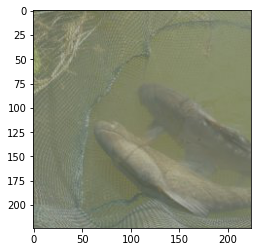

In [ ]:
Path='/content/gdrive/MyDrive/Test-Time training with MA/datasets/n01440764'
Im=plt.imread(Path+'/ILSVRC2012_val_00000293.JPEG')
plt.imshow(Im)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
%ls


 ILSVRC2012_val_00000236.JPEG  'noise.tar?download=1'
